In [17]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

Room light, broad spectrum emission

In [3]:
room_waveln = np.loadtxt("/content/drive/My Drive/Cort and Robin/Broad Emission 2.txt", usecols=0)
room_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/Broad Emission 2.txt", usecols=1)

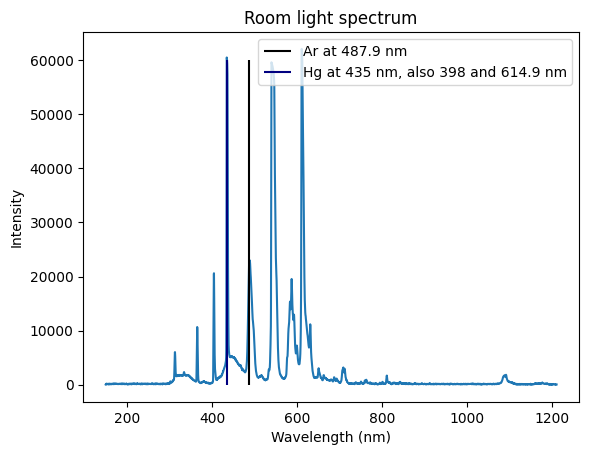

In [6]:
plt.plot(room_waveln, room_inten)
plt.vlines(487.9, 0, 60000, color="black", label="Ar at 487.9 nm") # Ar persistent 
#plt.vlines(545, 0, 60000, color="pink") # what is this???
plt.vlines(435, 0, 60000, color="navy", label="Hg at 435 nm, also 398 and 614.9 nm") # for sure mercury (Hg) also see line at 398 and 614.9
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Room light spectrum")
plt.legend(loc = 'upper right')



He spectral tube

In [8]:
he_waveln = np.loadtxt("/content/drive/My Drive/Cort and Robin/Helium Spectral Tube.txt", usecols=0)
he_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/Helium Spectral Tube.txt", usecols=1)

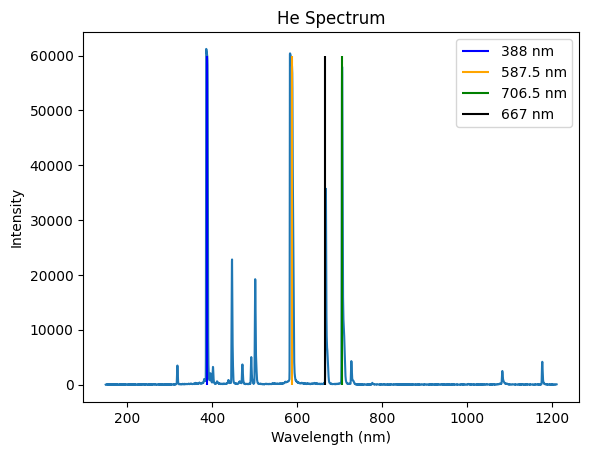

In [11]:
plt.plot(he_waveln, he_inten)
plt.vlines(388, 0, 60000, color="blue", label="388 nm")
plt.vlines(587.5, 0, 60000, color="orange", label="587.5 nm")
plt.vlines(706.5, 0, 60000,  color="green", label="706.5 nm")
plt.vlines(667, 0, 60000, color="black", label="667 nm")
plt.title("He Spectrum")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend()
# all 4 above are He persistent lines
#  what are the other peaks???????

Cold Na bulb (identifying ballast gas)

In [12]:
cold_na_waveln = np.loadtxt("/content/drive/My Drive/Cort and Robin/Cold NA.txt", usecols=0)
cold_na_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/Cold NA.txt", usecols=1)

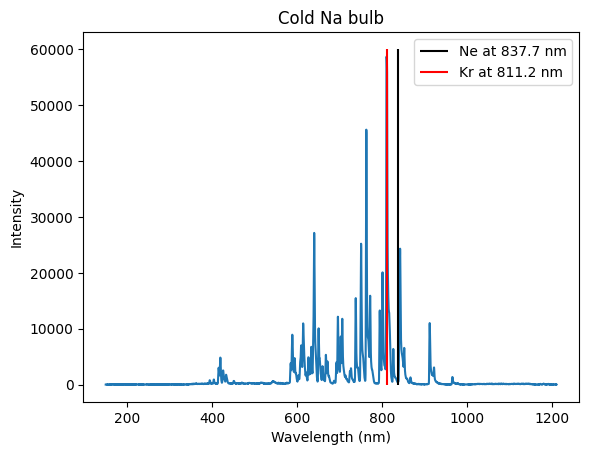

In [13]:
plt.plot(cold_na_waveln, cold_na_inten)
plt.title("Cold Na bulb")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.vlines(837.7, 0, 60000, color="black", label="Ne at 837.7 nm") # Ne?
plt.vlines(811.2, 0, 60000, color="red", label="Kr at 811.2 nm") # extremely good match with Kr spectral line 1000 P
plt.legend()
#plt.vlines(877.6, 0, 60000, color="black")

Hot Na bulb

In [15]:
hot_na_waveln = np.loadtxt("/content/drive/My Drive/Cort and Robin/Hot NA.txt", usecols=0)
hot_na_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/Hot NA.txt", usecols=1)

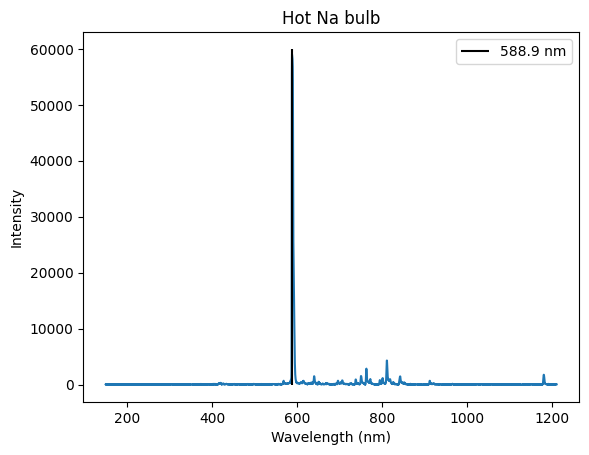

In [16]:
plt.plot(hot_na_waveln, hot_na_inten)
plt.title("Hot Na bulb")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.vlines(588.9, 0, 60000, color="black", label="588.9 nm")
plt.legend()

D-line widening, no B

In [18]:
d_no_b_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/D-line widening at zero field.txt", usecols=0)
d_no_b_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/D-line widening at zero field.txt", usecols=1)

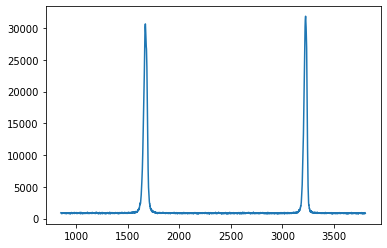

In [ ]:
plt.plot(d_no_b_pix, d_no_b_inten)

We know that this difference should be |588.9950 - 589.5924| nm = 0.5974 nm

In [ ]:
from scipy.signal import find_peaks

In [ ]:
find_peaks(d_no_b_inten, height=(25000, None))

(array([ 819, 2374]), {'peak_heights': array([30677.333, 31885.   ])})

In [19]:
# Finding the per-pixel resolution
pix_diff = d_no_b_pix[2374] - d_no_b_pix[819]
print(pix_diff)
# 0.5974 nm = 1555.0 pix
per_pix = 0.5974/1555.0
print("per-pix resolution: %f nm" % (per_pix))

1555.0
per-pix resolution: 0.000384 nm


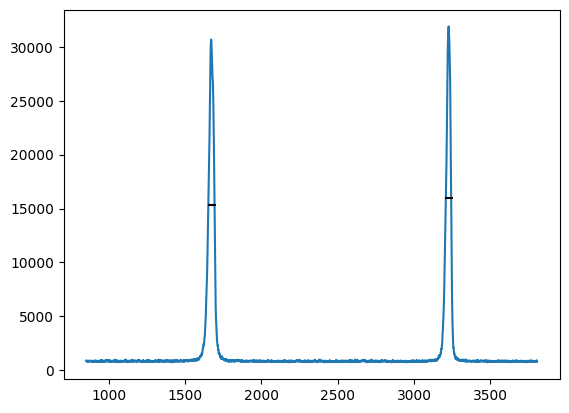

In [20]:
# Finding FWHM of the peaks
half_D = [30677.333/2, 31885.0/2]
plt.plot(d_no_b_pix, d_no_b_inten)
plt.hlines(half_D[0], 1648, 1701, color="black")
plt.hlines(half_D[1], 3199, 3254, color="black")

In [21]:
D_FWHM = [(1701 - 1648) * per_pix, (3254 - 3199) * per_pix]

D-line widening with B field

In [22]:
d_with_b_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/D-line widening at high B field.txt", usecols=0)
d_with_b_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/D-line widening at high B field.txt", usecols=1)

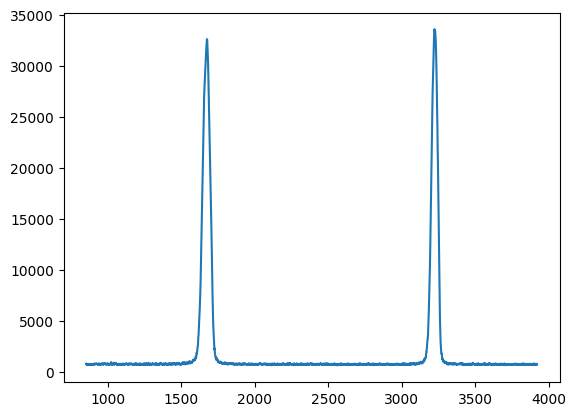

In [23]:
plt.plot(d_with_b_pix, d_with_b_inten)

In [ ]:
find_peaks(d_with_b_inten, height=(30000, None))

(array([ 822, 2370, 2374]),
 {'peak_heights': array([32590.   , 33543.   , 33534.333])})

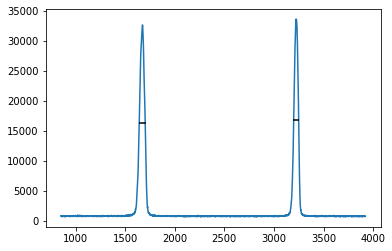

In [ ]:
plt.plot(d_with_b_pix, d_with_b_inten)
plt.hlines(32590.0/2, 1635, 1706, color="black")
plt.hlines(33543.0/2, 3188, 3257, color="black")

In [24]:
D_FWHM_B = [(1706 - 1635)*per_pix, (3257 - 3188)*per_pix]

In [25]:
print(D_FWHM, D_FWHM_B)

[0.02036154340836013, 0.021129903536977496] [0.027276784565916402, 0.02650842443729904]


In [26]:
D1_widening = D_FWHM_B[0] - D_FWHM[0]
D2_widening = D_FWHM_B[1] - D_FWHM[1]
print((D1_widening/0.25)*1000, (D2_widening/0.25)*1000)

27.66096463022509 21.514083601286178


Therefore, the D1 line widening is 27.661 pm/T and the D2 line widening is 21.5141 pm/T.

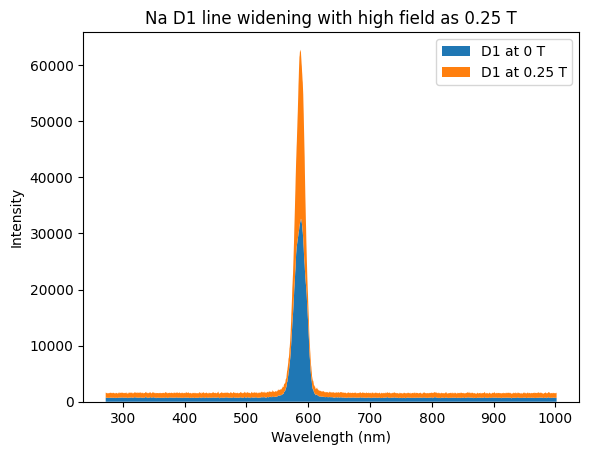

In [33]:
# making pretty visuals
d_waveln = (np.array(d_with_b_pix[0:1900]) * per_pix * 1000) - 55
labels = ["D1 at 0 T", "D1 at 0.25 T"]
plt.stackplot(d_waveln[0:1900], d_with_b_inten[0:1900], d_no_b_inten[0:1900], labels = labels) 
plt.title("Na D1 line widening with high field as 0.25 T")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend()

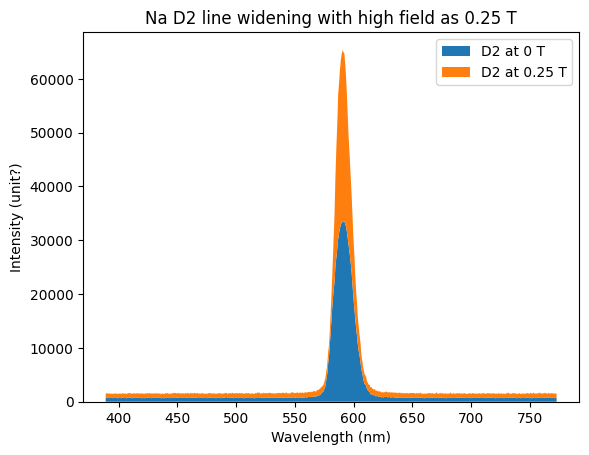

In [38]:
# making pretty visuals part 2
d_waveln = 1830 - (np.array(d_with_b_pix) * per_pix * 1000)
labels = ["D2 at 0 T", "D2 at 0.25 T"]
plt.stackplot(d_waveln[1900:2900], d_with_b_inten[1900:2900], d_no_b_inten[1900:2900], labels = labels) 
plt.title("Na D2 line widening with high field as 0.25 T")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (unit?)")
plt.legend()

B-field dependence

667 nm

In [ ]:
calb_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/calibration.txt", usecols=0)
calb_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/calibration.txt", usecols=1)

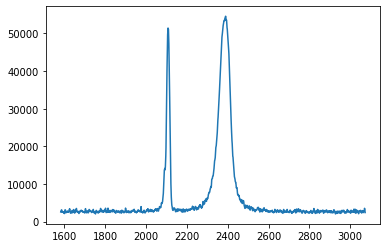

In [ ]:
plt.plot(calb_pix, calb_inten)

In [ ]:
# One wavelength is 667.81517 nm other is 696.5431 nm
wavelen_diff_667 = 667.81517 - 667.7282
find_peaks(calb_inten, height=(50000, None))
pix_diff_667 = (calb_pix[807] - calb_pix[525])
per_pix_667 = wavelen_diff_667/pix_diff_667
print(per_pix_667)

0.0003084042553189757


In [47]:
mm75_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/75mm.txt", usecols=0)
mm75_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/75mm.txt", usecols=1)

(array([578, 664, 752, 754]),
 {'peak_heights': array([47933.   , 53159.333, 48438.667, 48443.333])})

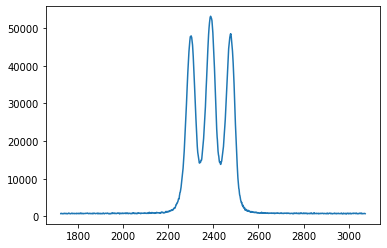

In [ ]:
plt.plot(mm75_pix, mm75_inten)
find_peaks(mm75_inten, height=(40000, None))

In [ ]:
delta_left75 = mm75_pix[664] - mm75_pix[578]
delta_right75 = mm75_pix[754] - mm75_pix[664]
avg_delta75 = ((delta_left75 + delta_right75)/2) * per_pix_667
print(avg_delta75)

0.02713957446806986


In [48]:
mm65_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/65mm.txt", usecols=0)
mm65_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/65mm.txt", usecols=1)

(array([309, 405, 409, 507]),
 {'peak_heights': array([49985.667, 54733.667, 55046.   , 50431.667])})

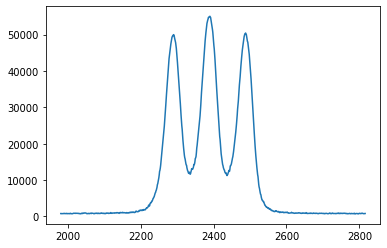

In [ ]:
plt.plot(mm65_pix, mm65_inten)
find_peaks(mm65_inten, height=(40000, None))

In [ ]:
delta_left65 = mm65_pix[409] - mm65_pix[309]
delta_right65 = mm65_pix[507] - mm65_pix[409]
avg_delta65 = ((delta_left65 + delta_right65)/2) * per_pix_667
print(avg_delta65)

0.030532021276578593


In [49]:
mm55_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/55mm.txt", usecols=0)
mm55_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/55mm.txt", usecols=1)

(array([267, 269, 379, 383, 495]),
 {'peak_heights': array([52967.   , 53128.   , 58582.667, 58435.667, 53664.667])})

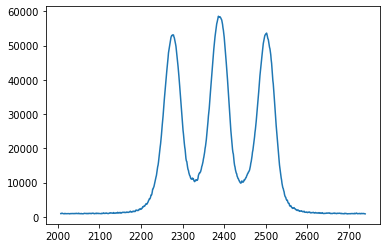

In [ ]:
plt.plot(mm55_pix, mm55_inten)
find_peaks(mm55_inten, height=(50000, None))

In [ ]:
delta_left55 = mm55_pix[379] - mm55_pix[269]
delta_right55 = mm55_pix[495] - mm55_pix[379]
avg_delta55 = ((delta_left55 + delta_right55)/2) * per_pix_667
print(avg_delta55)

0.03484968085104425


In [50]:
mm45_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/45mm.txt", usecols=0)
mm45_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/667/45mm.txt", usecols=1)

(array([302, 305, 429, 433, 562]),
 {'peak_heights': array([55574.333, 55434.333, 60832.667, 61260.   , 56370.   ])})

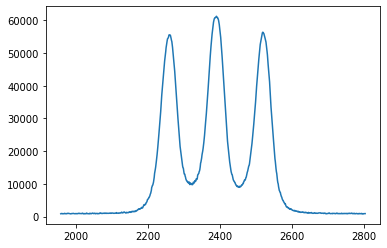

In [ ]:
plt.plot(mm45_pix, mm45_inten)
find_peaks(mm45_inten, height=(50000, None))

In [ ]:
delta_left45 = mm45_pix[433] - mm45_pix[302]
delta_right45 = mm45_pix[562] - mm45_pix[433]
avg_delta45 = ((delta_left45 + delta_right45)/2) * per_pix_667
print(avg_delta45)

0.04009255319146684


706 nm

In [ ]:
calb_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/calibration.txt", usecols=0)
calb_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/calibration.txt", usecols=1)

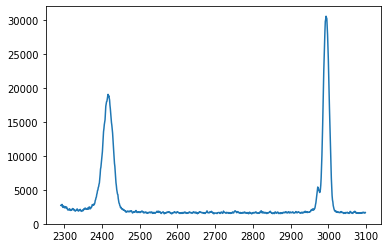

In [ ]:
plt.plot(calb_pix, calb_inten)

In [ ]:
wavelen_diff_706 = 706.7218 - 706.51771
find_peaks(calb_inten, height=(15000, None))
pix_diff_706 = (calb_pix[703] - calb_pix[125])
per_pix_706 = wavelen_diff_706/pix_diff_706
print(per_pix_706)

0.00035309688581326075


In [40]:
mm75_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/75mm.txt", usecols=0)
mm75_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/75mm.txt", usecols=1)

(array([389, 511, 513, 621, 625]),
 {'peak_heights': array([31805.333, 47603.333, 47400.   , 33279.667, 33628.667])})

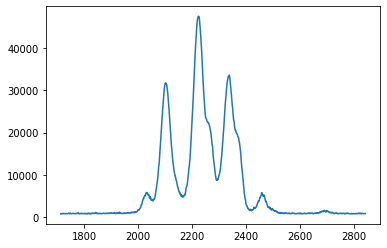

In [ ]:
plt.plot(mm75_pix, mm75_inten)
find_peaks(mm75_inten, height=(30000, None))

In [ ]:
delta_left75 = mm75_pix[511] - mm75_pix[389]
delta_right75 = mm75_pix[625] - mm75_pix[511]
avg_delta75 = ((delta_left75 + delta_right75)/2) * per_pix_706
print(avg_delta75)

0.04166543252596477


In [41]:
mm65_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/65mm.txt", usecols=0)
mm65_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/65mm.txt", usecols=1)

(array([353, 483, 611, 615]),
 {'peak_heights': array([28608.333, 41697.667, 29770.667, 29965.667])})

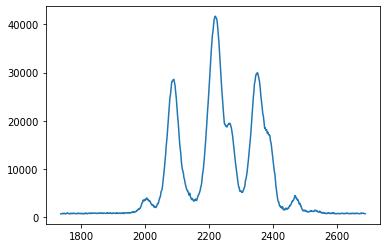

In [ ]:
plt.plot(mm65_pix, mm65_inten)
find_peaks(mm65_inten, height=(22000, None))

In [ ]:
delta_left65 = mm65_pix[483] - mm65_pix[353]
delta_right65 = mm65_pix[615] - mm65_pix[483]
avg_delta65 = ((delta_left65 + delta_right65)/2) * per_pix_706
print(avg_delta65)

0.04625569204153716


In [42]:
mm55_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/55mm.txt", usecols=0)
mm55_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/55mm.txt", usecols=1)

(array([357, 361, 509, 655, 657]),
 {'peak_heights': array([31297.333, 30525.   , 41495.333, 32226.667, 32365.667])})

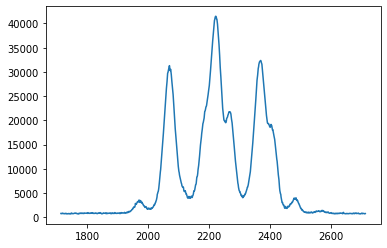

In [ ]:
plt.plot(mm55_pix, mm55_inten)
find_peaks(mm55_inten, height=(25000, None))

In [ ]:
delta_left55 = mm55_pix[509] - mm55_pix[357]
delta_right55 = mm55_pix[657] - mm55_pix[509]
avg_delta55 = ((delta_left55 + delta_right55)/2) * per_pix_706
print(avg_delta55)

0.052964532871989115


In [43]:
mm45_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/45mm.txt", usecols=0)
mm45_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/706/45mm.txt", usecols=1)

(array([385, 560, 564, 728, 732]),
 {'peak_heights': array([34401.333, 46774.   , 46103.667, 35840.667, 35938.   ])})

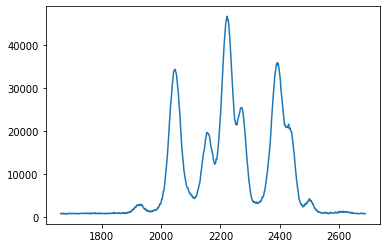

In [ ]:
plt.plot(mm45_pix, mm45_inten)
find_peaks(mm45_inten, height=(30000, None))

In [ ]:
delta_left45 = mm45_pix[560] - mm45_pix[385]
delta_right45 = mm45_pix[732] - mm45_pix[560]
avg_delta45 = ((delta_left45 + delta_right45)/2) * per_pix_706
print(avg_delta45)

0.06126230968860074


728 nm

In [ ]:
calb_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/calibration.txt", usecols=0)
calb_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/calibration.txt", usecols=1)

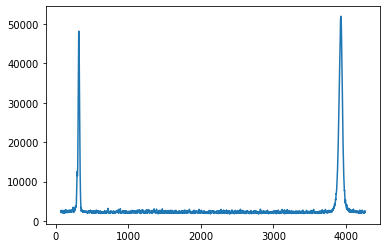

In [ ]:
plt.plot(calb_pix, calb_inten)

In [ ]:
wavelen_diff_728 = 728.135 - 727.294
find_peaks(calb_inten, height=(15000, None))
pix_diff_728 = (calb_pix[3859] - calb_pix[249])
per_pix_728 = wavelen_diff_728/pix_diff_728
print(per_pix_728)

0.00023296398891966985


In [ ]:
mm75_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/75mm.txt", usecols=0)
mm75_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/75mm.txt", usecols=1)

(array([394, 533, 535, 673]),
 {'peak_heights': array([47052.   , 55076.   , 55190.333, 46997.   ])})

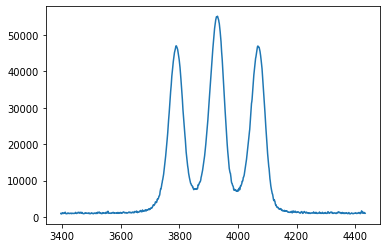

In [ ]:
plt.plot(mm75_pix, mm75_inten)
find_peaks(mm75_inten, height=(40000, None))

In [ ]:
delta_left75 = mm75_pix[535] - mm75_pix[394]
delta_right75 = mm75_pix[673] - mm75_pix[535]
avg_delta75 = ((delta_left75 + delta_right75)/2) * per_pix_728
print(avg_delta75)

0.03249847645429394


In [ ]:
mm65_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/65mm.txt", usecols=0)
mm65_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/65mm.txt", usecols=1)

(array([375, 533, 535, 691]),
 {'peak_heights': array([31042.667, 38223.   , 38273.333, 30909.   ])})

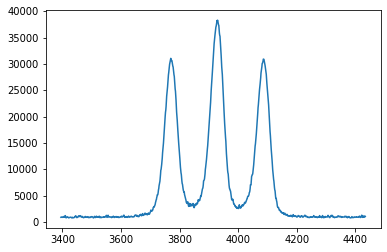

In [ ]:
plt.plot(mm65_pix, mm65_inten)
find_peaks(mm65_inten, height=(30000, None))

In [ ]:
delta_left65 = mm65_pix[535] - mm65_pix[375]
delta_right65 = mm65_pix[691] - mm65_pix[535]
avg_delta65 = ((delta_left65 + delta_right65)/2) * per_pix_728
print(avg_delta65)

0.036808310249307835


In [ ]:
mm55_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/55mm.txt", usecols=0)
mm55_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/55mm.txt", usecols=1)

(array([351, 355, 529, 533, 535, 711, 713, 715]),
 {'peak_heights': array([19042.333, 19676.333, 24798.333, 25546.667, 25584.333, 19445.333,
         19405.   , 19376.667])})

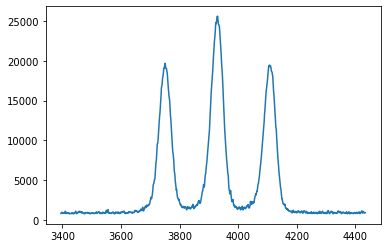

In [ ]:
plt.plot(mm55_pix, mm55_inten)
find_peaks(mm55_inten, height=(17000, None))

In [ ]:
delta_left55 = mm55_pix[535] - mm55_pix[355]
delta_right55 = mm55_pix[711] - mm55_pix[535]
avg_delta55 = ((delta_left55 + delta_right55)/2) * per_pix_728
print(avg_delta55)

0.041467590027701236


In [ ]:
mm45_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/45mm.txt", usecols=0)
mm45_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/728/45mm.txt", usecols=1)

(array([ 699,  907, 1111, 1115]),
 {'peak_heights': array([39096.667, 48668.   , 38722.   , 38926.   ])})

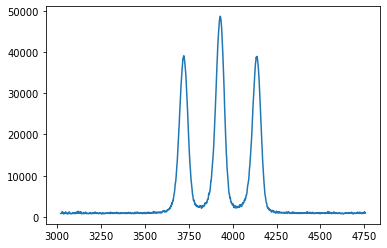

In [ ]:
plt.plot(mm45_pix, mm45_inten)
find_peaks(mm45_inten, height=(30000, None))

In [ ]:
delta_left45 = mm45_pix[907] - mm45_pix[699]
delta_right45 = mm45_pix[1115] - mm45_pix[907]
avg_delta45 = ((delta_left45 + delta_right45)/2) * per_pix_728
print(avg_delta45)

0.048456509695291326


Plotting delta_waveln vs. B

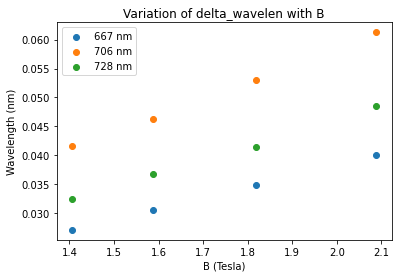

In [ ]:
mag = [(1.404 + 1.407)/2, (1.585 + 1.588)/2, (1.815 + 1.821)/2, (2.082+2.095)/2]
mag_err = [np.std([1.404, 1.407]), np.std([1.585, 1.588]), np.std([1.815, 1.821]), np.std([2.082, 2.095])]
delta_wavln667 = [0.02713957446806986, 0.030532021276578593, 0.03484968085104425, 0.04009255319146684]
delta_wavln706 = [0.04166543252596477, 0.04625569204153716, 0.052964532871989115, 0.06126230968860074]
delta_wavln728 = [0.03249847645429394, 0.036808310249307835, 0.041467590027701236, 0.048456509695291326]
#plt.errorbar(mag, delta_wavln667, xerr=mag_err, fmt="+")
#plt.errorbar(mag, delta_wavln667, xerr=mag_err, fmt="+")
#plt.errorbar(mag, delta_wavln667, xerr=mag_err, fmt="+")
plt.scatter(mag, delta_wavln667, label="667 nm")
plt.scatter(mag, delta_wavln706, label="706 nm")
plt.scatter(mag, delta_wavln728, label="728 nm")
plt.title("Variation of delta_wavelen with B")
plt.xlabel("B (Tesla)")
plt.ylabel("Wavelength (nm)")
plt.legend()

In [ ]:
def linear(x, m, b):
  new_x = np.array(x)
  return (m*new_x)+b

In [ ]:
from scipy.optimize import curve_fit
popt667, pcov667 = curve_fit(linear, mag, delta_wavln667)
popt706, pcov706 = curve_fit(linear, mag, delta_wavln706)
popt728, pcov728 = curve_fit(linear, mag, delta_wavln728)

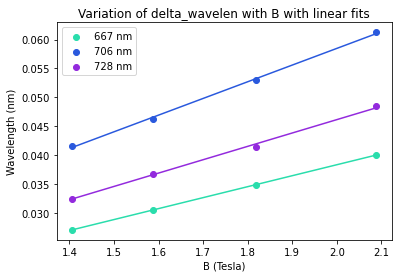

In [ ]:
# Pretty graph :)
plt.scatter(mag, delta_wavln667, label="667 nm", color="#2ADDAC")
plt.scatter(mag, delta_wavln706, label="706 nm", color="#2A59DD")
plt.scatter(mag, delta_wavln728, label="728 nm", color="#932ADD")
plt.plot(mag, linear(mag, *popt667), color="#2ADDAC")
plt.plot(mag, linear(mag, *popt706), color="#2A59DD")
plt.plot(mag, linear(mag, *popt728), color="#932ADD")
plt.title("Variation of delta_wavelen with B with linear fits")
plt.xlabel("B (Tesla)")
plt.ylabel("Wavelength (nm)")
plt.legend()

We know that the slope should be (mu_b * delta_m_l * lambda^2) / hc

In [ ]:
c = 3e8 # in SI
h = 6.626e-34 # in SI
slope667 = popt667[0] * 1e-9 # in m/T
slope706 = popt706[0] * 1e-9
slope728 = popt728[0] * 1e-9
mu_b667 = slope667*h*c/(667e-9 ** 2)
mu_b706 = slope706*h*c/(706e-9 ** 2)
mu_b728 = slope728*h*c/(728e-9 ** 2)
print(mu_b667, mu_b706, mu_b728)

8.46513103272392e-24 1.1493255237970441e-23 8.657952926562871e-24


In [ ]:
# Known value is 9.274010 J/T
real_val = 9.274010e-24
exp_val = (mu_b667+mu_b706+mu_b728)/3
mu_berr = np.std([mu_b667, mu_b706, mu_b728])
print("The experimental value of mu_b is %s +/- %s" % ("{:.2e}".format(exp_val), "{:.2e}".format(mu_berr)))
print("The experimental value is thus considered within error of the known value.")

The experimental value of mu_b is 9.54e-24 +/- 1.38e-24
The experimental value is thus considered within error of the known value.


1083 nm

In [ ]:
calb_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/calibration.txt", usecols=0)
calb_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/calibration.txt", usecols=1)

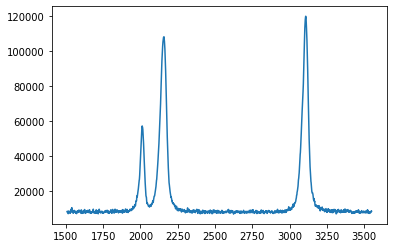

In [ ]:
plt.plot(calb_pix, calb_inten)

In [ ]:
wavelen_diff_1083 = 1083.837 - 1082.989
find_peaks(calb_inten, height=(80000, None))
pix_diff_1083 = calb_pix[1599] - calb_pix[649]
per_pix_1083 = wavelen_diff_1083/pix_diff_1083
print(per_pix_1083)

0.0008926315789473224


In [57]:
mm75_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/75mm.txt", usecols=0)
mm75_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/75mm.txt", usecols=1)

(array([384, 388, 450, 454, 476, 536, 556, 596, 644, 694, 698]),
 {'peak_heights': array([12948.333, 12435.   , 37678.   , 38743.333, 44479.333, 43810.667,
         58478.   , 11879.333, 42419.333, 11266.667, 11450.667])})

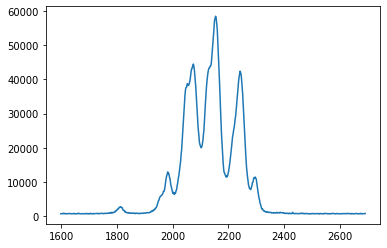

In [ ]:
plt.plot(mm75_pix, mm75_inten)
find_peaks(mm75_inten, height=(10000, None))
#plt.vlines(mm75_pix[384], 0, 60000, color="black")
#plt.vlines(mm75_pix[388], 0, 60000, color="black")
#plt.vlines(mm75_pix[450], 0, 60000, color="black")
#plt.vlines(mm75_pix[454], 0, 60000, color="black")
#plt.vlines(mm75_pix[476], 0, 60000, color="black")
#plt.vlines(mm75_pix[536], 0, 60000, color="black")
#plt.vlines(mm75_pix[556], 0, 60000, color="black")
#plt.vlines(mm75_pix[596], 0, 60000, color="black")
#plt.vlines(mm75_pix[644], 0, 60000, color="black")
#plt.vlines(mm75_pix[694], 0, 60000, color="black")
#plt.vlines(mm75_pix[698], 0, 60000, color="black")

In [ ]:
# Only 5 peaks are very visible
delta_1 = mm75_pix[454] - mm75_pix[384]
delta_2 = mm75_pix[476] - mm75_pix[454]
delta_3 = mm75_pix[536] - mm75_pix[476]
delta_4 = mm75_pix[556] - mm75_pix[536]
delta_5 = mm75_pix[596] - mm75_pix[556]
delta_6 = mm75_pix[644] - mm75_pix[596]
delta_7 = mm75_pix[698] - mm75_pix[644]
avg_delta75 = ((delta_1+delta_2+delta_3+delta_4+delta_5+delta_6+delta_7)/7) *per_pix_1083
print(avg_delta75)

0.040040902255637036


In [56]:
mm65_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/65mm.txt", usecols=0)
mm65_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/65mm.txt", usecols=1)

[364 367 425 429 433 451 487 515 518 523 549 583 589 595 643 701 704]
{'peak_heights': array([10913.667, 10978.333, 36581.667, 36857.333, 36519.   , 42462.333,
       14530.667, 38428.   , 38185.   , 37830.   , 54207.   , 10550.333,
        9468.333, 10272.333, 40236.667,  8529.667,  8745.333])}


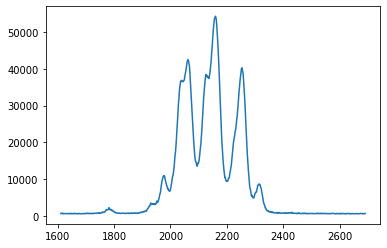

In [ ]:
plt.plot(mm65_pix, mm65_inten)
loc, high = find_peaks(mm65_inten, height=(8000, None))
print(loc)
print(high)

In [ ]:
delta_1 = mm65_pix[451] - mm65_pix[367]
delta_2 = mm65_pix[549] - mm65_pix[451]
delta_3 = mm65_pix[643] - mm65_pix[549]
delta_4 = mm65_pix[704] - mm65_pix[643]
avg_delta65 = ((delta_1+delta_2+delta_3+delta_4)/4) *per_pix_1083
print(avg_delta65)

0.07520421052631192


In [55]:
mm55_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/55mm.txt", usecols=0)
mm55_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/55mm.txt", usecols=1)

[451 455 457 460 463 473 475 487 514 521 525 539 545 575 579 617 621 625
 627 647 701 703 709 755 757 793 807 821 825 833 841]
{'peak_heights': array([ 3571.   ,  4255.333,  4376.   ,  4580.667,  4512.667,  3877.   ,
        3858.   ,  6219.667, 21010.333, 21369.333, 21109.   , 25167.667,
       24589.   ,  5156.333,  4820.   , 21822.333, 21565.   , 20768.667,
       20737.   , 30430.667,  4525.   ,  4594.667,  4648.667, 23165.   ,
       23276.   ,  2404.667,  2054.667,  2504.333,  2890.333,  3439.   ,
        2309.   ])}


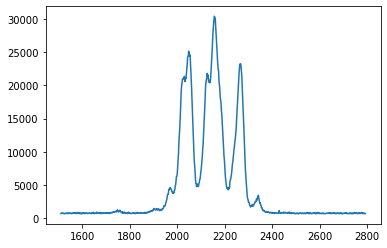

In [ ]:
plt.plot(mm55_pix, mm55_inten)
loc, high = find_peaks(mm55_inten, height=(2000, None))
print(loc)
print(high)

In [ ]:
delta_1 = mm55_pix[539] - mm55_pix[460]
delta_2 = mm55_pix[647] - mm55_pix[539]
delta_3 = mm55_pix[757] - mm55_pix[647]
delta_4 = mm55_pix[833] - mm55_pix[757]
avg_delta55 = ((delta_1+delta_2+delta_3+delta_4)/4) *per_pix_1083
print(avg_delta55)

0.08323789473683782


In [54]:
mm45_pix = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/45mm.txt", usecols=0)
mm45_inten = np.loadtxt("/content/drive/My Drive/Cort and Robin/1083/45mm.txt", usecols=1)

[183 187 197 343 351 353 359 361 367 373 403 417 447 455 458 495 497 522
 565 614 647 695 775 821 825 831 833 835 837 842 865]
{'peak_heights': array([ 2007.333,  2005.   ,  2069.   ,  2009.   ,  3002.   ,  2997.333,
        3069.667,  3124.   ,  2718.   ,  2130.   ,  2117.333,  3775.667,
       16335.   , 15943.667, 15903.   , 52316.333, 52317.333, 59272.667,
       10725.   , 52381.   , 63386.   , 41633.667, 56475.667,  4135.333,
        3845.333,  3763.333,  3847.667,  3902.667,  3896.   ,  4562.   ,
        9158.   ])}


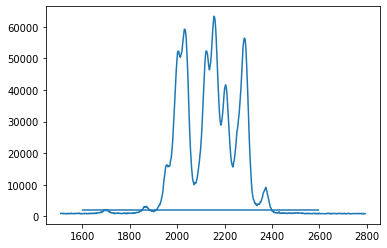

In [ ]:
plt.plot(mm45_pix, mm45_inten)
loc, high = find_peaks(mm45_inten, height=(2000, None))
print(loc)
plt.hlines(2000, 1600, 2600)
print(high)

In [ ]:
delta_1 = mm45_pix[522] - mm45_pix[497]
delta_2 = mm45_pix[614] - mm45_pix[522]
delta_3 = mm45_pix[647] - mm45_pix[614]
delta_4 = mm45_pix[695] - mm45_pix[647]
delta_5 = mm45_pix[775] - mm45_pix[695]
delta_6 = mm45_pix[865] - mm45_pix[775]
delta_7 = mm45_pix[497] - mm45_pix[197]
avg_delta45 = ((delta_1+delta_2+delta_3+delta_4+delta_5+delta_6+delta_7)/7) *per_pix_1083
print(avg_delta45)

0.08518255639097305


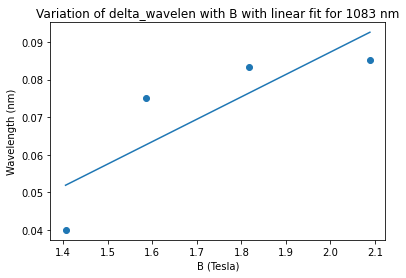

In [ ]:
# mu_b from IR plot only
delta_wavln1083 = [0.040040902255637036, 0.07520421052631192, 0.08323789473683782, 0.08518255639097305]
plt.scatter(mag, delta_wavln1083)
plt.title("Variation of delta_wavelen with B with linear fit for 1083 nm")
plt.xlabel("B (Tesla)")
plt.ylabel("Wavelength (nm)")
popt1083, pcov = curve_fit(linear, mag, delta_wavln1083)
plt.plot(mag, linear(mag, *popt1083))

In [ ]:
slope1083 = popt1083[0]
mu_b1083 = slope667*h*c/(1083e-9 ** 2)
print(mu_b1083)
percent_error = ((real_val - mu_b1083)/real_val) * 100
print("The value derived from the 1083 nm is %s J/T +/- %f percent" % ("{:.2e}".format(exp_val) , percent_error))

3.2109122687803466e-24
The value derived from the 1083 nm is 9.54e-24 J/T +/- 65.377304 percent


Analysis of lambda^2 dependence

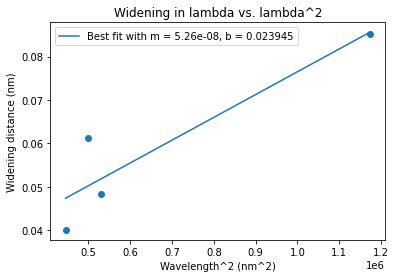

In [ ]:
l_sq = [(667.81517 ** 2), (706.5367 ** 2), (728.135 ** 2), (1083.03398 ** 2)]
delta_l = [0.04009255319146684, 0.06126230968860074, 0.048456509695291326, 0.08518255639097305]
plt.scatter(l_sq, delta_l)
popt_l, pcov_l = curve_fit(linear, l_sq, delta_l)
plt.plot(l_sq, linear(l_sq, *popt_l), label="Best fit with m = %s, b = %f" % ("{:.2e}".format(popt_l[0]), popt_l[1]))
plt.title("Widening in lambda vs. lambda^2")
plt.xlabel("Wavelength^2 (nm^2)")
plt.ylabel("Widening distance (nm)")
plt.legend()

Finding mu_b from the l^2 vs delta_l method

In [ ]:
slope_l = popt_l[0] * 1e9
mu_b_l = slope_l*h*c/((2.082+2.095)/2)
print(mu_b_l)
percent_err_l = ((9.274010e-24 - mu_b_l)/9.274010e-24) * 100
diff = 9.274010e-24 - mu_b_l
print(diff)
print("The l^2 vs delta_l graph gives us an experimental value of %s with a %f percent error" % ("{:.2e}".format(popt_l[0]), percent_err_l))

5.003287429736641e-24
4.270722570263359e-24
The l^2 vs delta_l graph gives us an experimental value of 5.26e-08 with a 46.050442 percent error


Therefore, the delta_l vs B graph gives us a more precise as well as accurate result.

**Pretty graphs here**

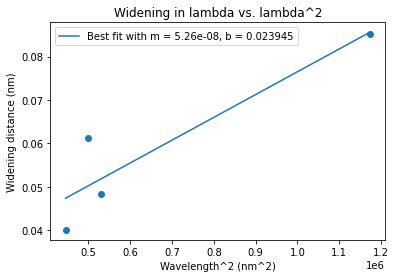

In [ ]:
l_sq = [(667.81517 ** 2), (706.5367 ** 2), (728.135 ** 2), (1083.03398 ** 2)]
delta_l = [0.04009255319146684, 0.06126230968860074, 0.048456509695291326, 0.08518255639097305]
plt.scatter(l_sq, delta_l)
popt_l, pcov_l = curve_fit(linear, l_sq, delta_l)
plt.plot(l_sq, linear(l_sq, *popt_l), label="Best fit with m = %s, b = %f" % ("{:.2e}".format(popt_l[0]), popt_l[1]))
plt.title("Widening in lambda vs. lambda^2")
plt.xlabel("Wavelength^2 (nm^2)")
plt.ylabel("Widening distance (nm)")
plt.legend()

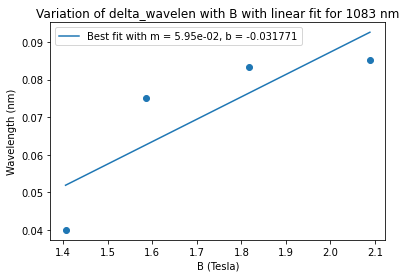

In [ ]:
delta_wavln1083 = [0.040040902255637036, 0.07520421052631192, 0.08323789473683782, 0.08518255639097305]
plt.scatter(mag, delta_wavln1083)
plt.title("Variation of delta_wavelen with B with linear fit for 1083 nm")
plt.xlabel("B (Tesla)")
plt.ylabel("Wavelength (nm)")
popt1083, pcov = curve_fit(linear, mag, delta_wavln1083)
plt.plot(mag, linear(mag, *popt1083), label="Best fit with m = %s, b = %f" % ("{:.2e}".format(popt1083[0]), popt1083[1]))
plt.legend()

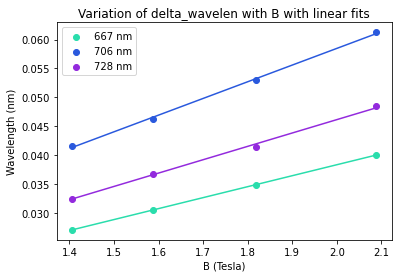

In [ ]:
# Pretty graph :)
plt.scatter(mag, delta_wavln667, label="667 nm", color="#2ADDAC")
plt.scatter(mag, delta_wavln706, label="706 nm", color="#2A59DD")
plt.scatter(mag, delta_wavln728, label="728 nm", color="#932ADD")
plt.plot(mag, linear(mag, *popt667), color="#2ADDAC")
plt.plot(mag, linear(mag, *popt706), color="#2A59DD")
plt.plot(mag, linear(mag, *popt728), color="#932ADD")
plt.title("Variation of delta_wavelen with B with linear fits")
plt.xlabel("B (Tesla)")
plt.ylabel("Wavelength (nm)")
plt.legend()

**mu_b from 706 nm not within error :(**

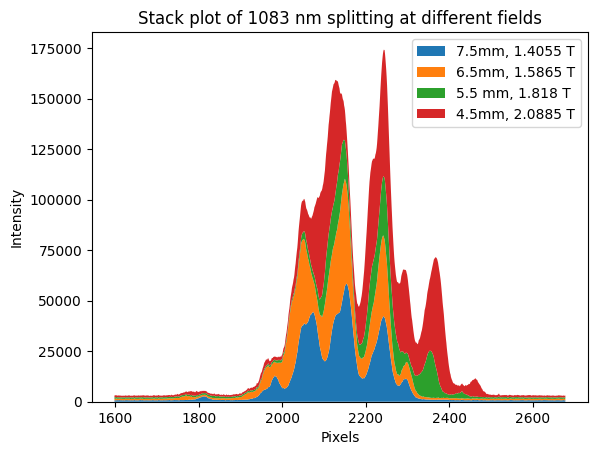

In [61]:
#plt.plot(mm75_pix, mm75_inten)
#plt.plot(mm65_pix, mm65_inten)
#plt.plot(mm55_pix, mm55_inten)
#plt.plot(mm45_pix, mm45_inten)
plt.title("Stack plot of 1083 nm splitting at different fields")
plt.xlabel("Pixels")
plt.ylabel("Intensity")
label = ["7.5mm, 1.4055 T", "6.5mm, 1.5865 T", "5.5 mm, 1.818 T", "4.5mm, 2.0885 T"]
plt.stackplot(mm75_pix[0:1081], mm75_inten[0:1081], mm65_inten[0:1081], mm55_inten[0:1081], mm45_inten[0:1081], labels=label)
plt.legend()